
#1. Derivadas.


En el metodo Smoothed-particle hydrodynamics ([SPH](!https://en.wikipedia.org/wiki/Smoothed-particle_hydrodynamics)) se emplean diferentes kernel de aproximación para calcular las propiedades  de un fluído en cada punto del espacio. Uno de ellos es el Kernel de Lucy detallado a continuación:

### Lucy's Quartic Kernel 
\begin{equation}
W(R, h)= \alpha_D \left\{
  \begin{matrix} \left(1+3q)(1- q^3\right) &  0\leq q< h \\ 
  0 & in\ the\ other\ case.
  \end{matrix}
\right.
\end{equation}

donde, 

\begin{equation}
q=\frac{|(\vec{r}-\vec{r}')|}{h}
\end{equation}

y $\alpha_D$ es la constante de normalización:

- en 2 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{5}{\pi h^2}
\end{equation}

- en 3 dimensiones, viene dada por:
\begin{equation}
\alpha_D = \frac{105}{16\pi h^3}
\end{equation}

Para el kernel de Lucy en 2D encontrar su derivada a través de los siguientes pasos:

1. Realizar un gráfico del kernel de Lucy.
2. Encontrar la derivada empleanda la libreria simbolica
3. Realizar un grafico de los cálculos encontrados con la  libreria simbólica  y comparar con la derivada numérica de los datos del punto 1. 

Recuerde siempre comparar sus resultados con sus cálculos realizados en papel y lapiz.


Opcional.

Resolver el problema en 3D






In [ ]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from scipy import  optimize
from sympy import init_printing
import matplotlib.pylab as plt
from scipy.interpolate import CubicSpline
init_printing() 

In [ ]:
r_=np.array([0,0])

In [ ]:
def q(r,r_,h):
  ''' Se definio la funcion q'''
    
  return abs(r-r_)/h
def W(q,h):
    if 0<=q and q<1:
        ad=5/(np.pi*(h**2))
        w=ad*(1+3*q)*((1-q)**3)
    else:
        w=0
    return w

In [ ]:
r_=np.linspace(-1,1)
a=q(0,r_,4)
y=np.zeros(len(a))

for i in range(len(a)):
    y[i]=W(a[i],4)


In [ ]:
plt.plot(r_, y)
plt.grid()

In [ ]:
from scipy import misc
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

In [ ]:
F=CubicSpline(r_,y)
d=np.vectorize(derivative)
d_=d(F,r_,dx=1e-6)


In [ ]:
plt.plot(r_,d_)
plt.grid()
#plt.ylim(-5,5)

In [ ]:
'''Calculo de la derrivada simbolica de W(q)'''
h=4
q = sp.symbols("q")
ad=5/(np.pi*(h**2))
f = lambda q: ad*(1+3*q)*((1-q)**3)  
f(q)

In [ ]:
h=4
r=0
def q1(r,r_,h):
  ''' Se definio la funcion q'''
    
  return abs(r-r_)/h
def F1(q1,h):
    if 0<=q1 and q1<1:
       fp = sp.diff(f(q),q, 1)
       fp_ = sp.lambdify(q, fp, "numpy")
       fn=fp_(q1)
    else:
        fn=0
    return fn


In [ ]:
r_=np.linspace(-1,1)
a=q1(0,r_,4)
z=np.zeros(len(a))

for i in range(len(a)):
    z[i]=F1(a[i],4)

In [ ]:
plt.plot(r_, z)
plt.grid()




# 2.0 Integración

1. Escribir en código Markdown la deducción para calcular una integral con la regla del trapecio. Ver libro guia.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular con los metodos 1,2,3 las siguientes integrales

- 
 $$
 \int_0^1 e^{1-x^2}\, dx
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity


6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the number of decimal places of presicion in your calculation.
6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

1/

#Método del trapecio.

> $$
  \int_{a}^{b} f(x)\,dx 
  = \sum_{i=0}^{N-1}  \int_{i}^{x_{i+1}} f(x)\,dx
  =  \frac{h}{2} \sum_{i=0}^{N-1}(f(x_i)+f(x_{i+1})) 
    - \frac{(b-a) h^2}{12}f''(\xi),
  $$

donde $\xi\in [b,a]$, $h=a-b$

Para encontrar el error, se debe de encontrar el maximo de $f''(\xi)$, para ello empleemos la libreria sympy, para mostrar la derivada de la función dada.

Después de encontrar el máximo de $f''(\xi)$ se halla h:

  $$
  \frac{(b-a)h^2}{12}f''(\xi)<\epsilon
  $$

  $$
  h = \sqrt{\frac{12\epsilon}{f''(\xi)(b-a)}}
  $$
  
  El método del trapecio se implementa usando la librería de scipy:
  
  from scipy import integrate

  integrate.trapz( f(x), x, h ) #f(x) función a integrar.


# En general la regla de simpson es:

 
$$
 \int_a^b f(x)dx = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{(n-1)}f(x_{2i}) + 4\sum_{i=1}^{n}f(x_{2i-1}) + f(b)\right]-\frac{b − a}{180}h^4f^{(4)}(\xi)
,$$
 
 donde $\xi ∈ (a,b).$


## Para deducir el numero de intervalos tenemos que : 
$$
\frac{b − a}{180}h^4f^{(4)}(\xi) = \epsilon
$$

$$
\frac{b − a}{180}h^4 \mathrm{Max} ||f^{(4)}(\xi)||=\epsilon
$$

con $$h = (b-a)/(2N)$$

$$
\frac{(b − a)^5}{180(2N)^4} \mathrm{Max} ||f^{(4)}(\xi)||=\epsilon
$$

$$
N^4 = \frac{(b − a)^5}{180(2)^4\epsilon} \mathrm{Max} ||f^{(4)}(\xi)||
$$

Se puede usar la librería de scipy para usar la regla de simpson con integrate.simps, o usando la función definida a continuación:



In [ ]:
def simpson(f, a, b, N):
    """
    Aproxima la integral de $f$ en $[a,b]$ mediante la fórmula compuesta 
    de Simpson con N subintervalos
    """
    n_nodos = 2*N+1 # (N+1 extremos de subintervalos) + (N puntos medios)
    x = np.linspace(a, b, n_nodos)

    x_impar = x[1: :2] # Nodos con coordenada impar (ptos medios)
    x_par = x[2:n_nodos-1:2] # Nodos con coordenada par (salvo el primero y el último)

    h = (b-a)/(2*N) # Distancia entre dos nodos de integración
    cuad = h/3*(f(a) + 2*sum(f(x_par)) + 4*sum(f(x_impar)) + f(b)) # F. comp. de Simpson
    return cuad  
  
#- La expresión `x`, o `x[:]`, representa todos los elementos de la lista x
#- La expresión `x[M:N]`, o `x[M:]`, representa los elementos `x[M]`, `x[M+1]`,..., `x[N-1]`
#- La expresión `x[M:N:k]`, o `x[M::k]`, representa los elementos `x[M]`, `x[M+k]`,..., `x[N-1]`
#x = np.linspace(0, 1, 10)
#x_impar = x[1:: 2]  
#x_par = x[2: -1: 2]
#print(x)
#print(x_impar)
#print(x_par)

# Método de cuadratura.
Para esto se usa la librería scipy, como:

from scipy.integrate import quad

quad_python = quad(f, a, b)

Punto 1
- 
 $$
 \int_0^1 e^{1-x^2}\, dx
 $$


In [ ]:
fs1 = lambda x: sp.exp(1- x**2)#Definicion de la función 
x = sp.symbols("x") #DEfinicion de x como simbolo.
fs1(x)

In [ ]:
f11=sp.lambdify(x, fs1(x), 'numpy')

In [ ]:
fd1=sp.diff(fs1(x),x,2)

f1= sp.lambdify(x, -fd1, 'numpy') #numpy funcion

x_ = np.linspace(0, 1)
print(f1(x_))

plt.figure()
plt.plot(x_, f1(x_))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [ ]:
m=optimize.fmin_powell( f1, 1,  ftol=1E-7 ) #Se encuentra el máximo valor


In [ ]:
k=abs(f1(m))

k #Máximo

In [ ]:
e=1e-5
b=1
a=0
h=np.sqrt((12*e)/k) #Se obtiene h usando el máximo
h

In [ ]:
from scipy import integrate
integrate.trapz( f11(x_), x_,h)

Punto 2

$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

In [ ]:
fs2 = lambda x: 1/(1 + x**2)    #Definicion de la función 
x = sp.symbols("x")              #Definicion de x como simbolo.
fs2(x)

In [ ]:
x = sp.symbols("x")
fs2 = lambda x: 1/(1 + x**2) 
fs2(x)

In [ ]:
f2 = sp.diff(fs2(x),x, 2) #Se realiza la segunda derivada de la función.
f22_ = sp.lambdify(x, fs2(x), 'numpy') #Se convierte la función a numpy
f2_ = sp.lambdify(x, -f2, 'numpy') #Se convierte la función derivada a numpy

fn=f2_(x)

In [ ]:
f2

In [ ]:
f2_(x)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,100)
#Se grafica para tener referencia de donde esta el máximo de la segunda derivada

plt.plot(x,f2_(x))
plt.xlabel('x')
plt.ylabel('f2')
plt.title('2da derivada')
plt.grid()
plt.show()

In [163]:
arr = np.array([ 0.052     ,  0.05563446,  0.05957394,  0.06384731,  0.0684863 ,
        0.07352576,  0.0790039 ,  0.08496257,  0.09144753,  0.09850863,
        0.10620004,  0.11458034,  0.12371257,  0.13366404,  0.14450597,
        0.15631283,  0.16916118,  0.18312795,  0.19828792,  0.2147101 ,
        0.23245266,  0.25155601,  0.27203338,  0.2938583 ,  0.31694798,
        0.34114178,  0.36617337,  0.39163564,  0.41693701,  0.44124837,
        0.46344057,  0.48201367,  0.49502167,  0.5       ,  0.49390863,
        0.47311093,  0.43341752,  0.37023362,  0.27885571,  0.15496275,
       -0.00466802, -0.20122924, -0.4328127 , -0.69337282, -0.972     ,
       -1.25284843, -1.51603725, -1.73967506, -1.90284429, -1.98900597,
       -1.98900597, -1.90284429, -1.73967506, -1.51603725, -1.25284843,
       -0.972     , -0.69337282, -0.4328127 , -0.20122924, -0.00466802,
        0.15496275,  0.27885571,  0.37023362,  0.43341752,  0.47311093,
        0.49390863,  0.5       ,  0.49502167,  0.48201367,  0.46344057,
        0.44124837,  0.41693701,  0.39163564,  0.36617337,  0.34114178,
        0.31694798,  0.2938583 ,  0.27203338,  0.25155601,  0.23245266,
        0.2147101 ,  0.19828792,  0.18312795,  0.16916118,  0.15631283,
        0.14450597,  0.13366404,  0.12371257,  0.11458034,  0.10620004,
        0.09850863,  0.09144753,  0.08496257,  0.0790039 ,  0.07352576,
        0.0684863 ,  0.06384731,  0.05957394,  0.05563446,  0.052     ])

In [ ]:
import numpy as np
np.amax(arr)

In [ ]:
from scipy import  optimize

In [ ]:
f=optimize.fmin_powell( f2_, 1,  ftol=1E-7 ) #Se obtiene el máximo a partir de optimize

In [ ]:
from sympy import oo


In [ ]:
e=1e-5
b1=0
a1=-oo
h1=np.sqrt((12*e)/0.5) #Se calcula h usando los valores dados, y el máximo.

In [ ]:
x_ = np.linspace(-100,0,10**3) #Se usa el método del trapecio explicado anteriormente para obtener el valor de la integral
from scipy import integrate
#Valor de la integrla de -oo a 0
sum1 = integrate.trapz( f22_(x_),x_,h1)
sum1

In [ ]:
e=1e-5
b2=oo
a2=0
h2=np.sqrt((12*e)/0.5) #Se calcula h usando los valores dados, y el máximo.

In [ ]:
x_ = np.linspace(0,100,100000000)
from scipy import integrate
#Valor de la integral de 0 a oo
sum2 = integrate.trapz( f22_(x_),x_,h2)
sum2

In [ ]:
sumT = sum1 + sum2
sumT #Suma de los valores encontrados al partir la integral.

Punto 3

- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$


In [ ]:
from sympy import *

In [ ]:
fs2= lambda y: 2*y*sp.sin(x)+sp.cos(x)**2    #Definicion de la función 
x = sp.symbols("x")
y = sp.symbols("y")              #Definicion de x como simbolo.
fs2(y)

In [ ]:
integrate(fs2(y),y)

In [ ]:
a=integrate(fs2(y),(y,sp.sin(x),sp.cos(x)))
a

In [ ]:
b=sp.diff(a,x,4)
ffn=sp.lambdify(x, a, 'numpy')
fx = sp.lambdify(x, -b, 'numpy')
x_ = np.linspace(0, np.pi/4)
print(fx(x_))

plt.figure()
plt.plot(x_, fx(x_))
plt.show() 

In [122]:
m=optimize.fmin_powell( fx, 0.3,  ftol=1E-7 )


Optimization terminated successfully.
         Current function value: -29.169788
         Iterations: 2
         Function evaluations: 46


In [123]:
M2=abs(fx(m))
M2

In [124]:
e=1e-5
a=0
b=np.pi/4
def n(a, b, M):
  return ((b-a)**5*M/(e*180*2**4))**(1./4)

N=n(a,b,M2)

In [125]:
from scipy import integrate
integrate.simps(ffn(x_),x_,N)

El valor numerico aproximado de la doble integral es:

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy = 0.511844103899355
 $$

# Punto 4:
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$

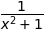

In [164]:
fs2 = lambda x: 1/(1 + x**2)    #Definicion de la función 
x = sp.symbols("x")              #Definicion de x como simbolo.
fs2(x)

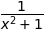

In [167]:
x = sp.symbols("x")
fs2 = lambda x: 1/(1 + x**2) 
fs2(x)

In [168]:
f2 = sp.diff(fs2(x),x, 2) #Se realiza la segunda derivada de la función.
f22_ = sp.lambdify(x, fs2(x), 'numpy') #Se convierte la función a numpy
f2_ = sp.lambdify(x, -f2, 'numpy') #Se convierte la función derivada a numpy

fn=f2_(x)

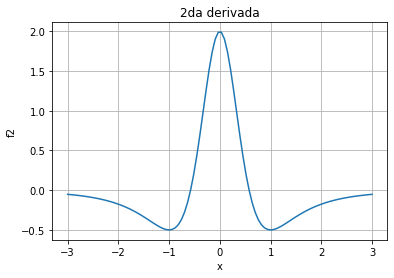

In [169]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,100)
#Se grafica para tener referencia de donde esta el máximo de la segunda derivada

plt.plot(x,f2_(x))
plt.xlabel('x')
plt.ylabel('f2')
plt.title('2da derivada')
plt.grid()
plt.show()

In [217]:
s1 = integrate.quadrature(f22_,0,550)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadrature.py:251: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.190112e-03
  AccuracyWarning)


In [218]:
s2 = integrate.quadrature(f22_,-550,0)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadrature.py:251: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.190112e-03
  AccuracyWarning)


In [219]:
s = s1[0] + s2[0]

El valor de la integral con el método de cuadratura es: 3.14429395300917

# Punto 5
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$


In [127]:
fs4 = lambda x: 1/sp.ln(x)
x = sp.symbols("x")              
fs4(x)

In [128]:
f4 = sp.diff(fs4(x),x, 4)
f44_ = sp.lambdify(x, fs4(x), 'numpy')
f4_ = sp.lambdify(x, -f4, 'numpy')

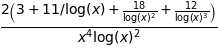

In [129]:
f4 # 4ta derivada de fs4

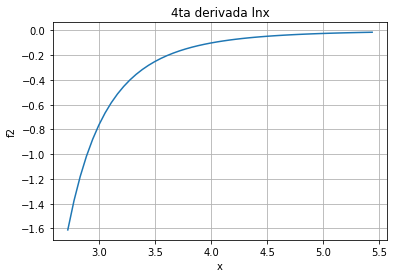

In [161]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import  optimize

x = np.linspace(np.exp(1),2*np.exp(1),50)


plt.plot(x,f4_(x))
plt.xlabel('x')
plt.ylabel('f2')
plt.title('4ta derivada lnx')
plt.grid()
plt.show()

In [131]:
f=optimize.fmin_powell( f4_, 2,  ftol=1E-7 )

Optimization terminated successfully.
         Current function value: -inf
         Iterations: 4
         Function evaluations: 172


<string>:2: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1986: RuntimeWarning: invalid value encountered in subtract
  p = (x - v) * tmp2 - (x - w) * tmp1
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1987: RuntimeWarning: invalid value encountered in subtract
  tmp2 = 2.0 * (tmp2 - tmp1)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)


In [132]:
a1=-f4_(f)

<string>:2: RuntimeWarning: divide by zero encountered in double_scalars


In [133]:
e=1e-5
a = np.exp(1)
b=  2*np.exp(1)
def N(a, b, M):
  return ((b - a)**5*M/(e*180*2**4))**(1./4)

N(a,b,a1)

In [162]:
n = N(a,b,a1)
from scipy import integrate
integrate.simps(f44_(x),x,n)

El valor de la integral $$
 \int_{e}^{2e} \frac{1}{\ln x}  \, dx = 2.00381353729943
 $$


5. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity

In [135]:
f=lambda z:z**-2
z=sp.symbols("z") #Definición de la función a integrar
f(z)

In [136]:
f_=sp.lambdify(z,f(z))


In [137]:
z=np.linspace(1,1000,10000) #Se aproxima el límte a infinito
ine=integrate.simps(f_(z),z) #Se usa el método de simpson para encontrar el valor de la integral
v=np.sqrt(2*9.8*6371e3*ine) #Valor de la velocidad positiva
print('La velocidad de escape aproximada es: %f m/s' %v)

La velocidad de escape aproximada es: 11170.217777 m/s



6 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

6.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

6.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the number of decimal places of presicion in your calculation.
6.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large

In [138]:
from scipy import integrate


In [139]:
ft=lambda t: sp.exp(-t)
t=sp.symbols("t") #Se define la función para integrar con los diferentes métodos.
ft(t)

In [140]:

fl=sp.lambdify(t,ft(t), 'numpy')
t=np.linspace(0,10) #Gráfico de la función


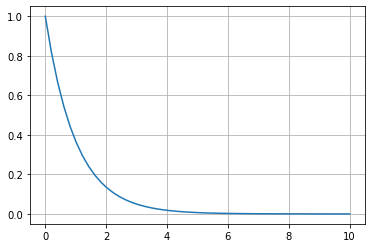

In [159]:
plt.plot(t,fl(t))
plt.grid()
plt.show()

In [142]:
df=pd.DataFrame({'N':[2,10,20,40,80,160]}) #N dados

In [143]:
df

,N
0,2
1,10
2,20
3,40
4,80
5,160


In [144]:
f=lambda N:1-np.exp(-N)
a=f(df.N) #Valores exactos para la función al variar N.
a

0    0.864665
1    0.999955
2    1.000000
3    1.000000
4    1.000000
5    1.000000
Name: N, dtype: float64

In [145]:
t1=np.linspace(0,df.N[0],300) #Intervalos diferentes según N para ingresar en loS diferentes métodos de integración
t2=np.linspace(0,df.N[1],300)
t3=np.linspace(0,df.N[2],300)
t4=np.linspace(0,df.N[3],300)
t5=np.linspace(0,df.N[4],300)
t6=np.linspace(0,df.N[5],300)

In [146]:
def f(t): #Definición para usar el método del trapecio para distintos N.
  I=integrate.trapz(fl(t),t)
  return I

In [147]:
df2=pd.DataFrame({'Númerico':[f(t1),f(t2),f(t3),f(t4),f(t5),f(t6)],'Exacto': a})
df2 #Dataframe para valor númerico y exacto encontrado con distintos N.

,Númerico,Exacto
0,0.864668,0.864665
1,1.000048,0.999955
2,1.000373,1.000000
3,1.001491,1.000000
4,1.005959,1.000000
5,1.023749,1.000000


In [148]:
(0.864668-0.864665)/0.864665

In [149]:
eps= lambda n,E: np.abs((n-E))/E #Función para error relativo
  
et=eps(df2.Númerico, df2.Exacto) #Error relativo

In [150]:
def s(t): #Con el método de simpson
  I=integrate.simps(fl(t),t)
  return I

In [151]:
df3=pd.DataFrame({'Númerico':[s(t1),s(t2),s(t3),s(t4),s(t5),s(t6)],'Exacto': a})
df3 #Valores para el segundo método.

,Númerico,Exacto
0,0.864665,0.864665
1,0.999956,0.999955
2,1.000012,1.000000
3,1.000095,1.000000
4,1.000724,1.000000
5,1.005270,1.000000


In [152]:
es=eps(df3.Númerico, df3.Exacto)

In [153]:
def q(i): #Método de cuadratura.
  I=integrate.quadrature(fl,0,i)
  return I

In [154]:
#a=[float(q(2)[0]),q(10)[0],q(20)[0],q(40)[0],q(80)[0],q(160)[0]]
nn=[float(q(2)[0]),float(q(10)[0]),float(q(20)[0]),float(q(40)[0]),float(q(80)[0]),float(q(160)[0])]


In [155]:
df4=pd.DataFrame({'Númerico':nn,'Exacto': a})
df4 #Dataframe de los valores para el método de cuadratura.

,Númerico,Exacto
0,8.646647e-01,0.864665
1,9.999546e-01,0.999955
2,1.000000e+00,1.000000
3,1.000000e+00,1.000000
4,1.000000e+00,1.000000
5,1.654757e-13,1.000000


In [156]:
eg=eps(df4.Númerico, df4.Exacto)

In [157]:
#DataFrame para los errores relativos encontrados con los 3 metodos, para distintos N. 
#"'e_t': Error relativo para el metodo de trapecio, 'e_s': Error relativo para el metodo de Simpson,'e_g': Error relativo para el metodo de cuadratura""
dfin=pd.DataFrame({'N':[2,10,20,40,80,160], 'e_t': et, 'e_s': es,'e_g': eg})
dfin

,N,e_t,e_s,e_g
0,2,0.000004,1.634298e-08,6.672909e-13
1,10,0.000093,1.539916e-06,5.125133e-12
2,20,0.000373,1.216871e-05,3.450723e-10
3,40,0.001491,9.501133e-05,8.188297e-10
4,80,0.005959,7.243117e-04,1.078460e-09
5,160,0.023749,5.270066e-03,1.000000e+00


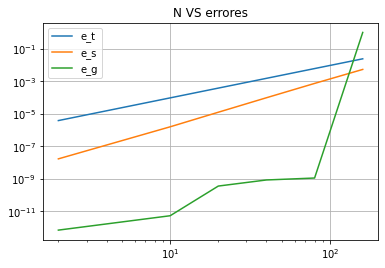

In [158]:
plt.plot(dfin['N'],dfin['e_t'],label = "e_t")
plt.plot(dfin['N'],dfin['e_s'],label = "e_s")
plt.plot(dfin['N'],dfin['e_g'],label = "e_g")
plt.legend()
plt.title("N VS errores")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()